<center>
<img align ="left" src="assets/hacettepe.png" alt="Hacettepe University Logo" width="200\">
<br><h1>HACETTEPE UNIVERSITY</h1>
<h1>ELE492 : Image Processing | HW-1</h1>
<h2>Ayşe İdman - 21728366</h2>
</center>

___

### Q1)
<br>


<pre>I have not received or given any aid in this homework. 
All the work presented below is my own work.
                
                                                    <b>Ayşe İdman </b>
</pre>
<img align ="right" src="assets/signature.png" alt="Hacettepe University Logo" width="250">

___

### Q2)

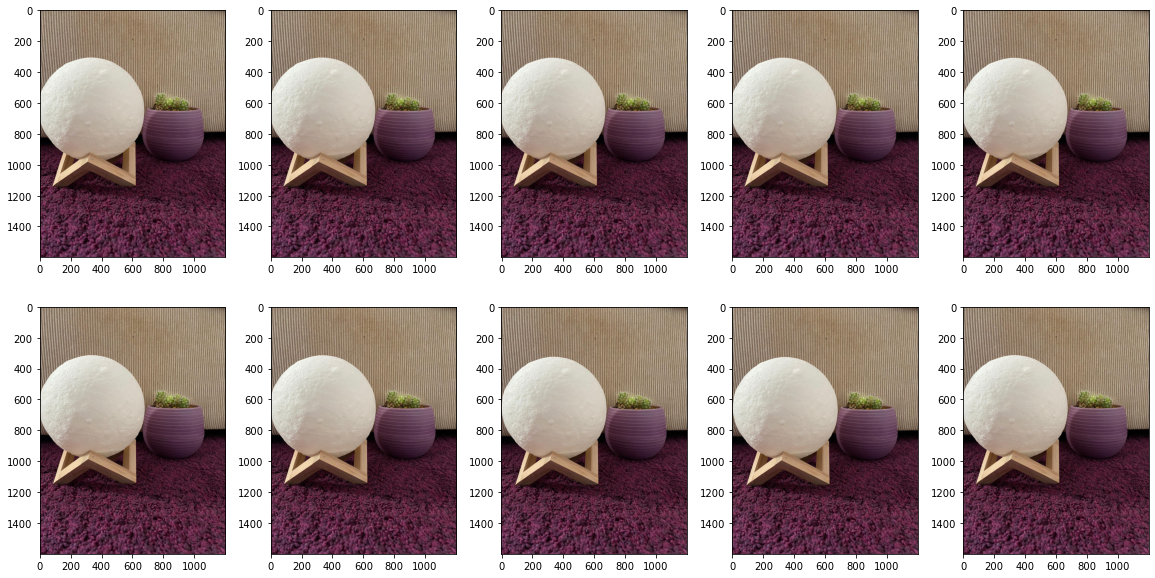

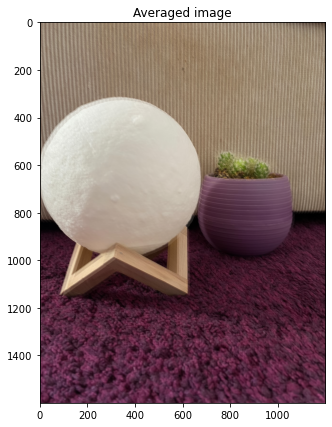

In [2]:
import cv2 
from matplotlib import pyplot as plt 
import numpy as np


fig = plt.figure(figsize=(20, 10)) 
rows = 2
columns = 5

images = [cv2.imread("assets/images/" +str(i)+ ".jpeg") for i in range(1,11)]
images = np.array(images)
images_rgb = images[...,::-1].copy() #convert bgr to rgb

for i in range (10) :
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(images_rgb[i]) 
    plt.axis('on') 

#taking average
images_avg = np.average(images_rgb,axis = 0)
average = images_avg.astype('uint8')
fig2 = plt.figure(figsize=(10, 7))
plt.title("Averaged image")
plt.imshow(average) 
plt.show()



In this question I have took 10 images with my phone. Even though I fixed the camera and objects, my phone has came loose a litte bit while taking the pictures. As a result the averaged photo looks like slightly shifted. However this is kinda good for me because if I could have taken the perfect 10 photos, I would not be able to obtain any difference between the 10 image and the averaged image. 
In addition, I also use conversion from bgr to rgb in order to show the images in original colors. 

___

### Q3)

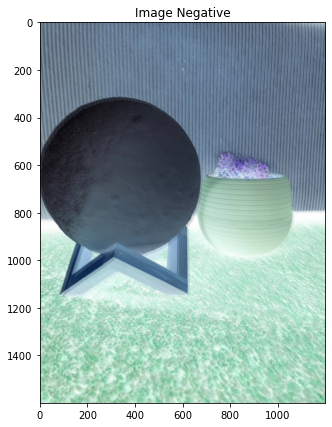

In [2]:
#taking negative
def im_negative(img): 
    return 255 - img 

fig3 = plt.figure(figsize=(10, 7))
plt.title("Image Negative")
plt.imshow(im_negative(average)) 
plt.show()


___

### Q4)

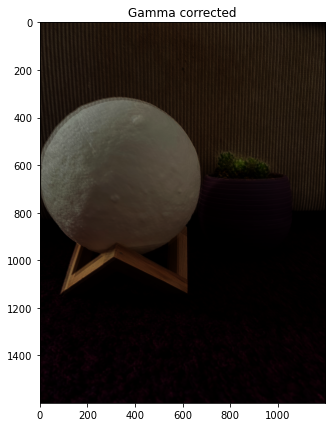

In [3]:
#Gamma correction
def gamma_corr(img,g,c):
    gamma_corrected = (np.power(img/255, g)*c)*255
    gamma_corrected = gamma_corrected.astype('uint8')
    return gamma_corrected

g = 3
c = 0.6
gamma_corrected = gamma_corr(average,g,c)
fig4 = plt.figure(figsize=(10, 7))
plt.title("Gamma corrected")
plt.imshow(gamma_corrected) 
plt.show()




___

### Q5)

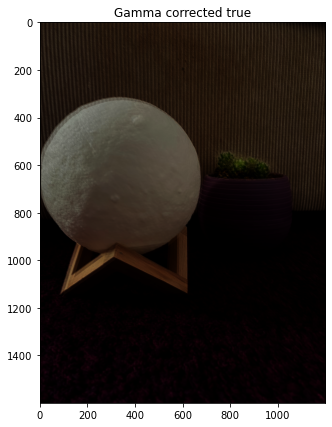

True

In [4]:
from skimage import data, exposure
gamma_corrected_true = exposure.adjust_gamma(average, g, c)
fig5 = plt.figure(figsize=(10, 7))
plt.title("Gamma corrected true")
plt.imshow(gamma_corrected_true) 
plt.show()

isEqual = gamma_corrected == gamma_corrected_true
isEqual.all()

As expected, I obtain the same results in Q4 and Q5. We can see that. But in order to get more precise outcome, I checked in the code if the two images are exactly same. As you can see it return true so there is no problem.

___

### Q6)

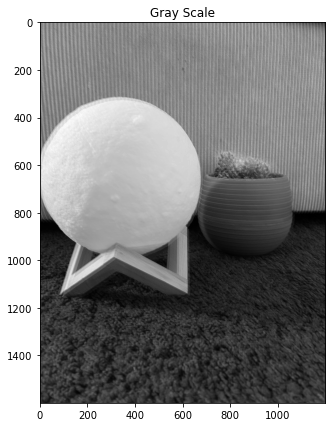

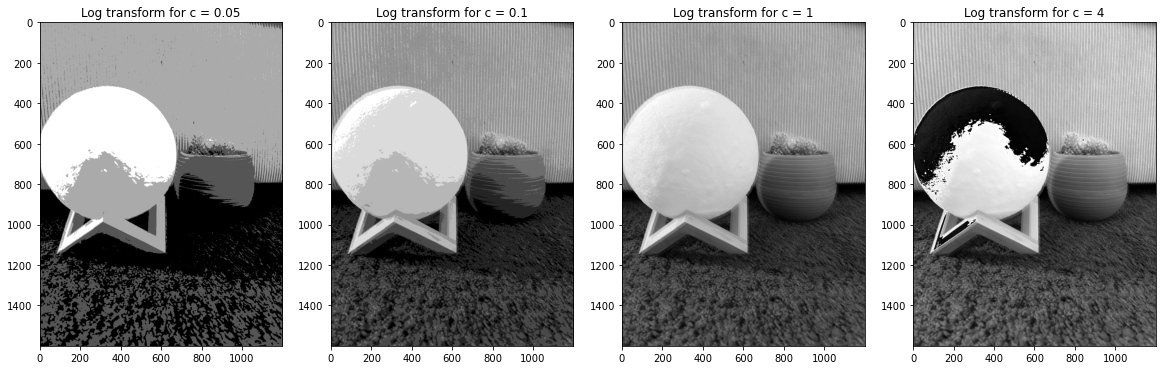

In [5]:
#converting to grayscale so that i can observe log tranformation effect more clear
from skimage.color import rgb2gray
gray_average = rgb2gray(average)

#log_average = c * (np.log10(gray_average + 1))*255
#log_average = log_average.astype('uint8')

fig7 = plt.figure(figsize=(10, 7))
plt.title("Gray Scale")
plt.imshow(gray_average ,cmap = plt.cm.gray) 
plt.show()

def log_transform(c,image):
    log_average = c * (np.log10(gray_average + 1))*255
    log_average = log_average.astype('uint8')
    return log_average

i = 0
fig8 = plt.figure(figsize=(20, 10))
for c in [0.05,0.1,1,4] : 
    i += 1
    fig8.add_subplot(1, 4, i)
    plt.title("Log transform for c = " + str(c))
    plt.imshow(log_transform(c,gray_average),cmap = plt.cm.gray) 
    
plt.show()


First of all, in order to observe the effects of the log transformations more clear, I convert the image to grayscale. Then I observe four different images with four different c values. With log transformation (it can be seen best when c = 1) darker colors get more bright whereas lighter colors change less. In the third image (c = 1) the moon lamb is almost the same whereas the carpet get lighter. 
On the other hand, when I increase c even further (c = 4) an overflow error occurs I believe. Because as you can see, lightest part of the image turned to really dark.

___

### Q7)

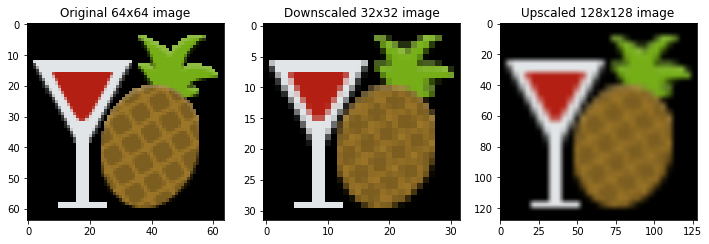

In [6]:
image = cv2.imread("assets/hb.png")
image = image[...,::-1].copy() #convert bgr to rgb

fig9 = plt.figure(figsize=(12,12))
fig9.add_subplot(1, 3, 1)
plt.title("Original 64x64 image")
plt.imshow(image) 

#downscale by 2
width = int(image.shape[1] /2)
height = int(image.shape[0] /2)
dim = (width, height)
resized = cv2.resize(image, dim)

fig9.add_subplot(1, 3, 2)
plt.title("Downscaled 32x32 image")
plt.imshow(resized)

#upscale by 4
width = int(resized.shape[1] *4)
height = int(resized.shape[0] *4)
dim = (width, height)
resized = cv2.resize(resized, dim)

fig9.add_subplot(1, 3, 3)
plt.title("Upscaled 128x128 image")
plt.imshow(resized) 
plt.show()

When I downscaled the image by 2, I observe that the image resolution has gotten worse. It is expected because when you downscale an image you lose some data. 
In addition, image got blurry when I upscaled it with 4. This effect is normal because it acts as a low pass filter.

___